Создать таблицу author следующей структуры:

In [ ]:
CREATE TABLE author(
    author_id INT PRIMARY KEY AUTO_INCREMENT, 
    name_author VARCHAR(50)
);

Заполнить таблицу author. В нее включить следующих авторов:
Булгаков М.А.
Достоевский Ф.М.
Есенин С.А.
Пастернак Б.Л.

In [ ]:
INSERT INTO author (name_author) 
VALUES ('Булгаков М.А.'), ('Достоевский Ф.М.'), ('Есенин С.А.'), ('Пастернак Б.Л.');

# Создание таблицы с внешними ключами
При создании зависимой таблицы (таблицы, которая содержит внешние ключи) необходимо учитывать, что :

каждый внешний ключ должен иметь такой же тип данных, как связанное поле главной таблицы (в наших примерах это INT);
необходимо указать главную для нее таблицу и столбец, по которому осуществляется связь:
FOREIGN KEY (связанное_поле_зависимой_таблицы)  
REFERENCES главная_таблица (связанное_поле_главной_таблицы)
По умолчанию любой столбец, кроме ключевого, может содержать значение NULL. При создании таблицы это можно переопределить,  используя  ограничение NOT NULL для этого столбца:

CREATE TABLE таблица (
    столбец_1 INT NOT NULL, 
    столбец_2 VARCHAR(10) 
);
 В созданной таблице в столбец_1 не может содержать пустое значение, а столбец_2 - может.

Для внешних ключей рекомендуется устанавливать ограничение NOT NULL (если это совместимо с другими опциями, которые будут рассмотрены в следующем шаге).

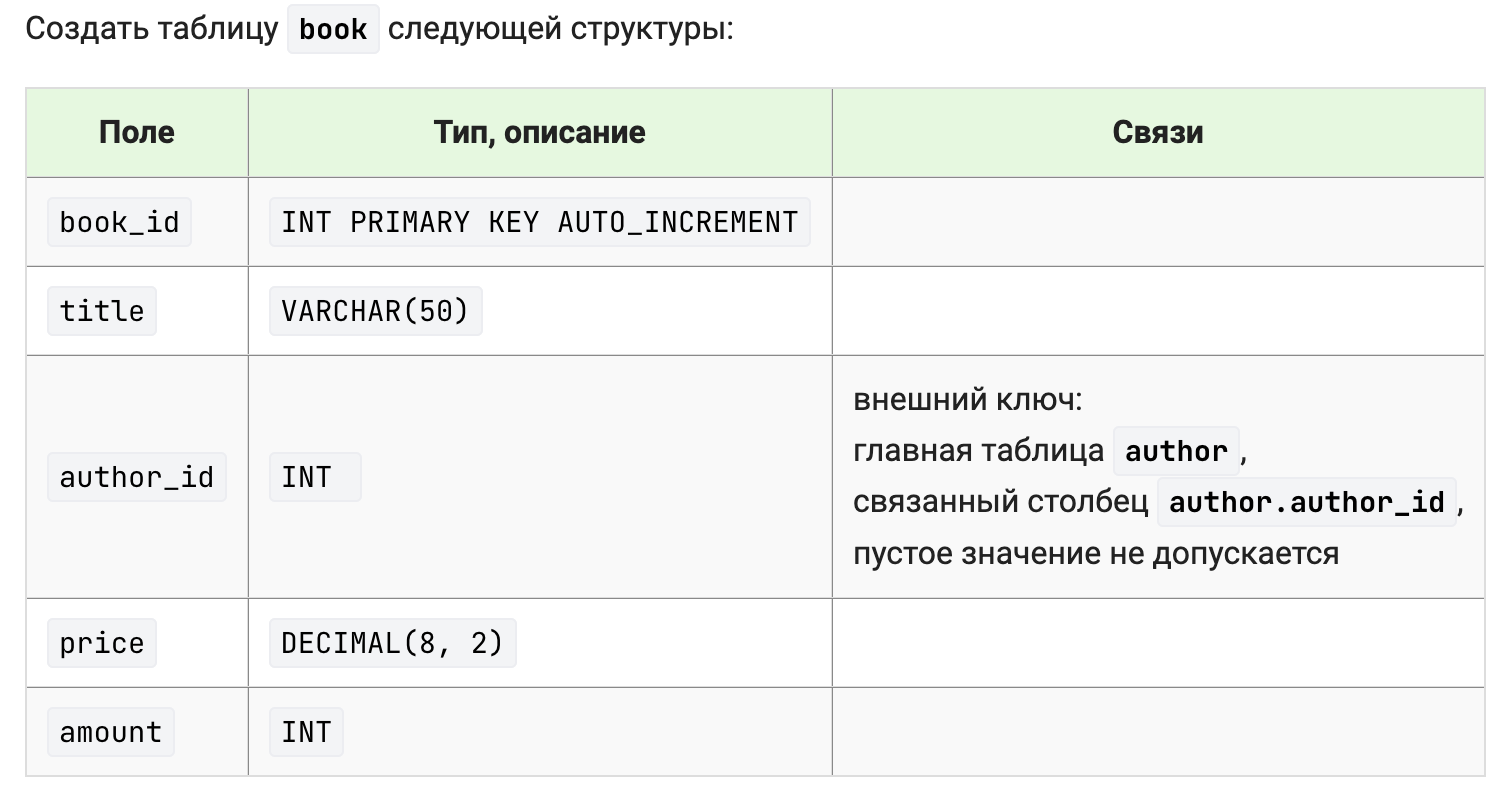

In [ ]:
CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL, 
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id) 
);

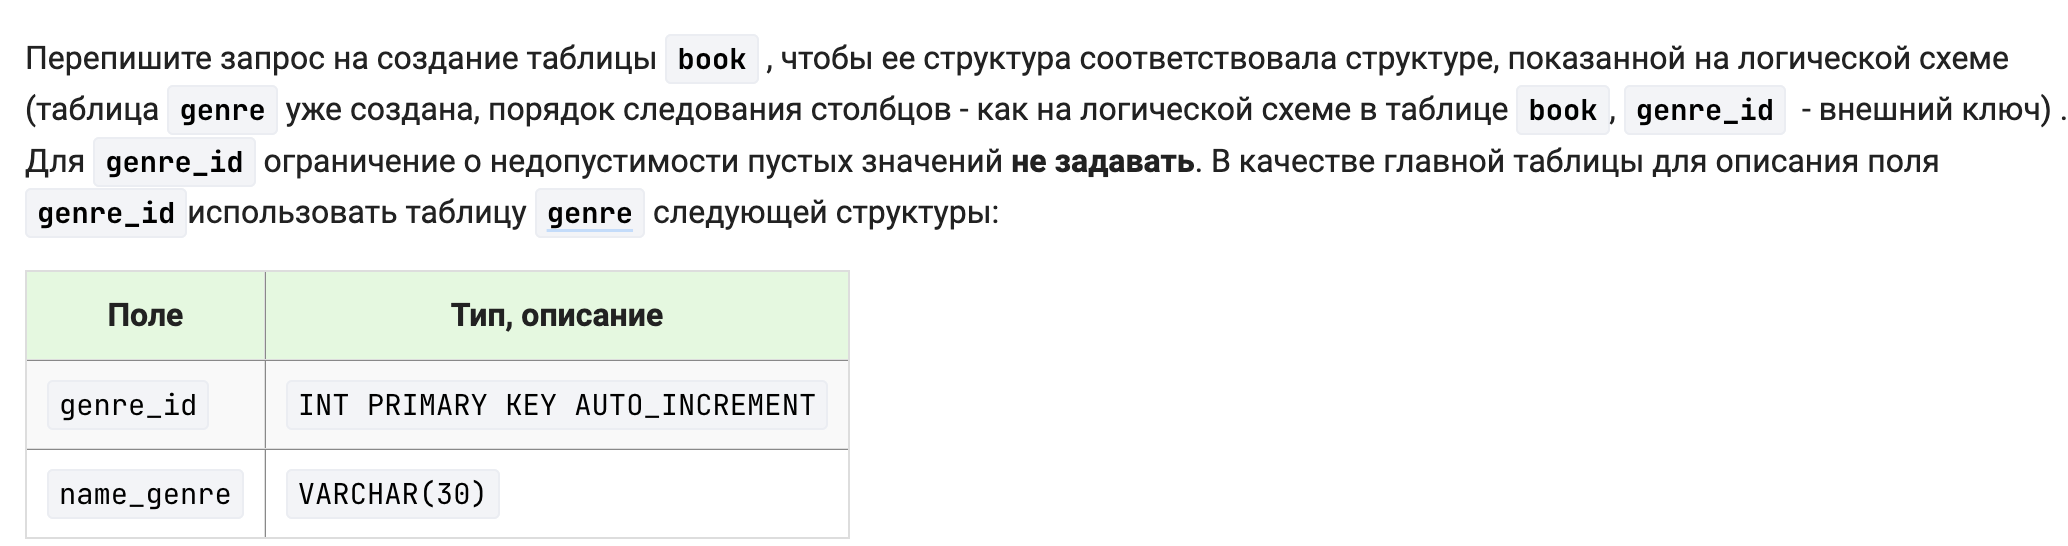

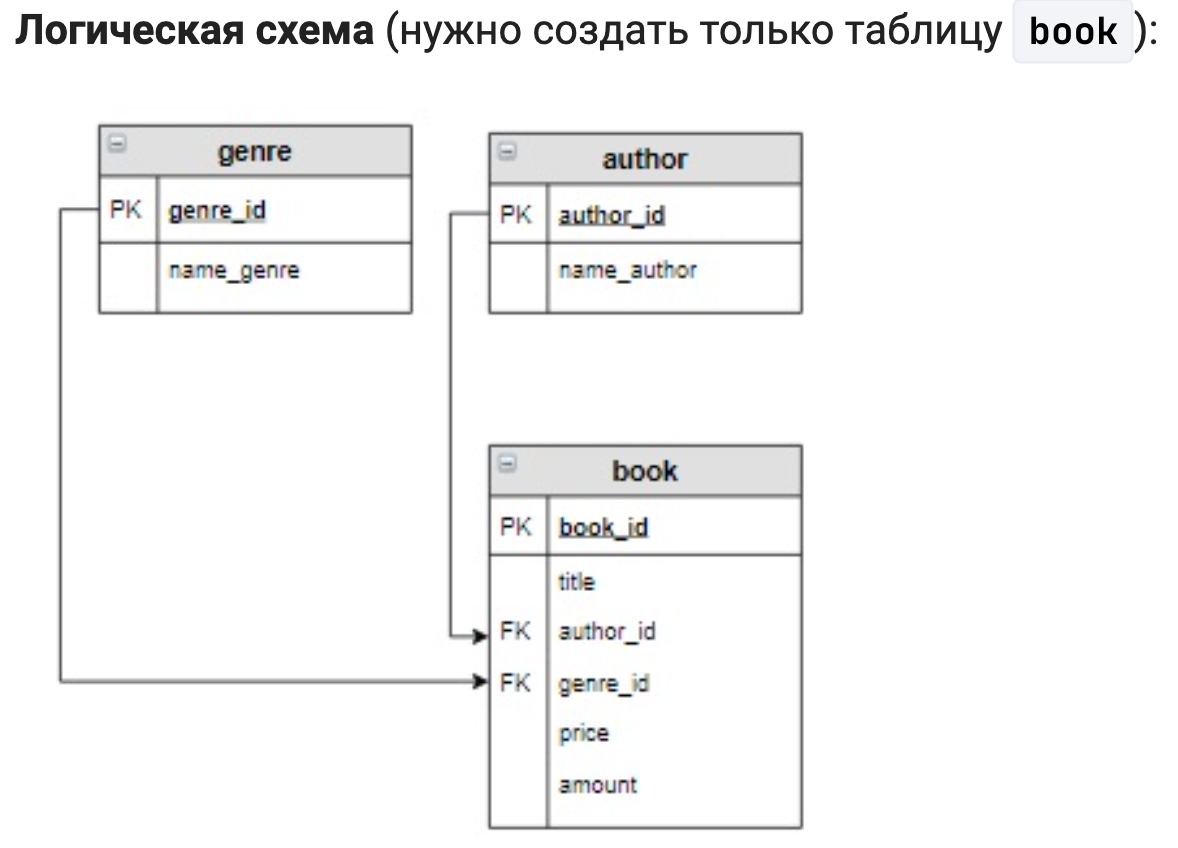

In [ ]:
CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL,
    genre_id INT,
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id),
    FOREIGN KEY (genre_id)  REFERENCES genre (genre_id)
);

Действия при удалении записи главной таблицы
С помощью выражения ON DELETE можно установить действия, которые выполняются для записей подчиненной таблицы при удалении связанной строки из главной таблицы. При удалении можно установить следующие опции:

CASCADE: автоматически удаляет строки из зависимой таблицы при удалении  связанных строк в главной таблице.
SET NULL: при удалении  связанной строки из главной таблицы устанавливает для столбца внешнего ключа значение NULL. (В этом случае столбец внешнего ключа должен поддерживать установку NULL).
SET DEFAULT похоже на SET NULL за тем исключением, что значение  внешнего ключа устанавливается не в NULL, а в значение по умолчанию для данного столбца.
RESTRICT: отклоняет удаление строк в главной таблице при наличии связанных строк в зависимой таблице.

Важно! Если для столбца установлена опция SET NULL, то при его описании нельзя задать ограничение на пустое значение.

Пример

Будем считать, что при удалении автора из таблицы author, необходимо удалить все записи о книгах из таблицы book, написанные этим автором. Данное действие необходимо прописать при создании таблицы.

Запрос:

CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL, 
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id) ON DELETE CASCADE
);


Задание
Создать таблицу book той же структуры, что и на предыдущем шаге. Будем считать, что при удалении автора из таблицы author, должны удаляться все записи о книгах из таблицы book, написанные этим автором. А при удалении жанра из таблицы genre для соответствующей записи book установить значение Null в столбце genre_id

In [ ]:
CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL,
    genre_id INT,
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id) ON DELETE CASCADE,
    FOREIGN KEY (genre_id)  REFERENCES genre (genre_id) ON DELETE SET NULL
);

Задание
Добавьте три последние записи (с ключевыми значениями 6, 7, 8) в таблицу book, первые 5 записей уже добавлены:

In [ ]:
INSERT INTO book (title, author_id, genre_id, price, amount) 
VALUES ('Стихотворения и поэмы',3,2,650.00,15),
('Черный человек',3,2,570.20,6),
('Лирика',4,2,518.99,2);

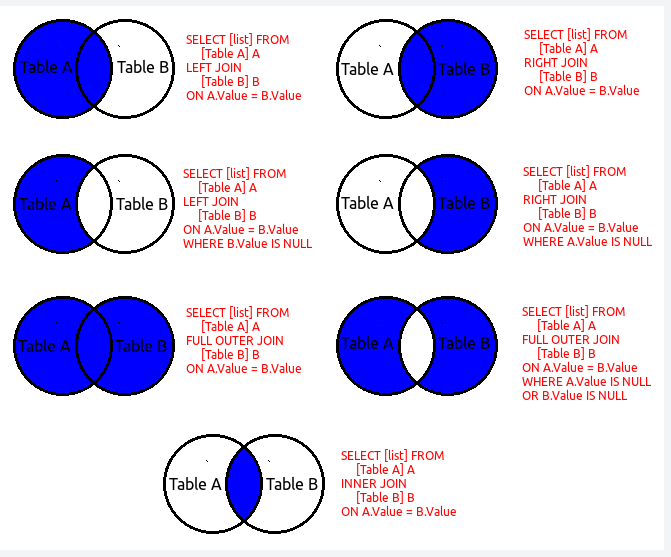

Соединение `INNER JOIN`
Оператор внутреннего соединения INNER JOIN соединяет две таблицы. Порядок таблиц для оператора неважен, поскольку оператор является симметричным.

SELECT
 ...
FROM
    таблица_1 INNER JOIN  таблица_2
    ON условие
...
Результат запроса формируется так:

каждая строка одной таблицы сопоставляется с каждой строкой второй таблицы;
для полученной «соединённой» строки проверяется условие соединения;
если условие истинно, в таблицу результата добавляется соответствующая «соединённая» строка;
Пример

Вывести название книг и их авторов.

Запрос:

SELECT title, name_author
FROM 
    author INNER JOIN book
    ON author.author_id = book.author_id;
Поскольку поля author_id в таблицах book и author называются одинаково, необходимо в запросах указывать полную ссылку на них (book.author_id и author.author_id).

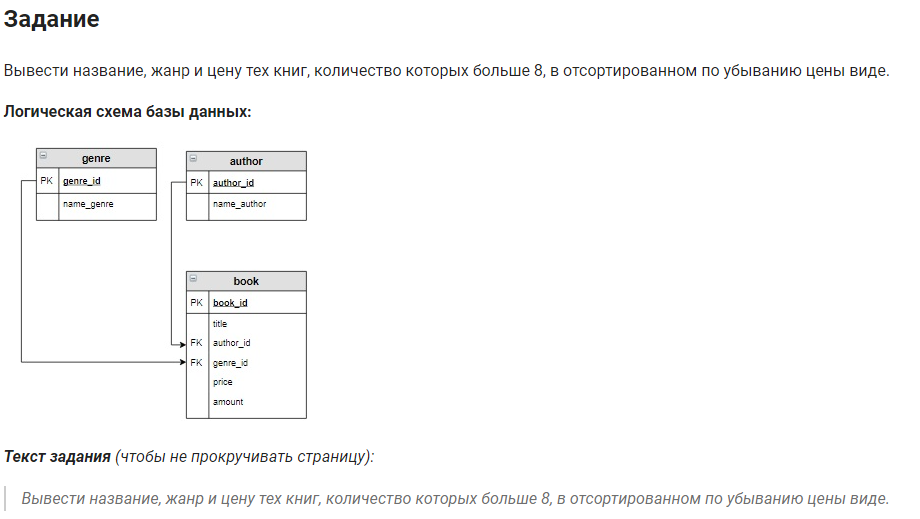

In [ ]:
SELECT title, name_genre, price
FROM 
    genre INNER JOIN book
    ON genre.genre_id = book.genre_id
WHERE amount > 8
ORDER BY price DESC;

Внешнее соединение `LEFT и RIGHT OUTER JOIN`
Оператор внешнего соединения LEFT OUTER JOIN  (можно использовать LEFT JOIN) соединяет две таблицы. Порядок таблиц для оператора важен, поскольку оператор не является симметричным.

SELECT
 ...
FROM
    таблица_1 LEFT JOIN  таблица_2
    ON условие
...
Результат запроса формируется так:

в результат включается внутреннее соединение (INNER JOIN) первой и второй таблицы в соответствии с условием;
затем в результат добавляются те записи первой таблицы, которые не вошли во внутреннее соединение на шаге 1, для таких записей соответствующие поля второй таблицы заполняются значениями NULL.
Соединение RIGHT JOIN действует аналогично, только в пункте 2 первая таблица меняется на вторую и наоборот.

Пример

Вывести название всех книг каждого автора, если книг некоторых авторов в данный момент нет на складе – вместо названия книги указать Null.

Запрос:

SELECT name_author, title 
FROM author LEFT JOIN book
     ON author.author_id = book.author_id
ORDER BY name_author;

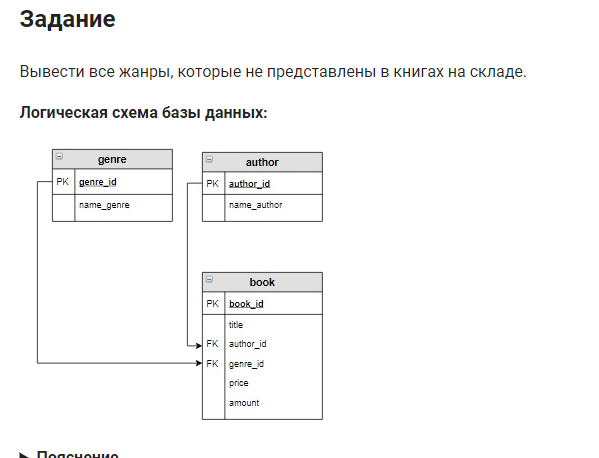

In [ ]:
SELECT name_genre 
FROM genre LEFT JOIN book
     ON genre.genre_id = book.genre_id
WHERE book.genre_id is NULL

Перекрестное соединение `CROSS JOIN`
Оператор перекрёстного соединения, или декартова произведения CROSS JOIN (в запросе вместо ключевых слов можно поставить запятую между таблицами) соединяет две таблицы. Порядок таблиц для оператора неважен, поскольку оператор является симметричным. Его структура:

SELECT
 ...
FROM
    таблица_1 CROSS JOIN  таблица_2
...
или

SELECT
 ...
FROM
    таблица_1, таблица_2
...
Результат запроса формируется так: каждая строка одной таблицы соединяется с каждой строкой другой таблицы, формируя  в результате все возможные сочетания строк двух таблиц.

Например, запрос:

SELECT name_author, name_genre
FROM 
    author, genre;
каждому автору из таблицы author поставит в соответствие все возможные жанры из таблицы genre:

+------------------+-------------+
| name_author      | name_genre  |
+------------------+-------------+
| Булгаков М.А.    | Роман       |
| Булгаков М.А.    | Поэзия      |
| Булгаков М.А.    | Приключения |
| Достоевский Ф.М. | Роман       |
| Достоевский Ф.М. | Поэзия      |
| Достоевский Ф.М. | Приключения |
| Есенин С.А.      | Роман       |
| Есенин С.А.      | Поэзия      |
| Есенин С.А.      | Приключения |
| Пастернак Б.Л.   | Роман       |
| Пастернак Б.Л.   | Поэзия      |
| Пастернак Б.Л.   | Приключения |
| Лермонтов М.Ю.   | Роман       |
| Лермонтов М.Ю.   | Поэзия      |
| Лермонтов М.Ю.   | Приключения |
+------------------+-------------+

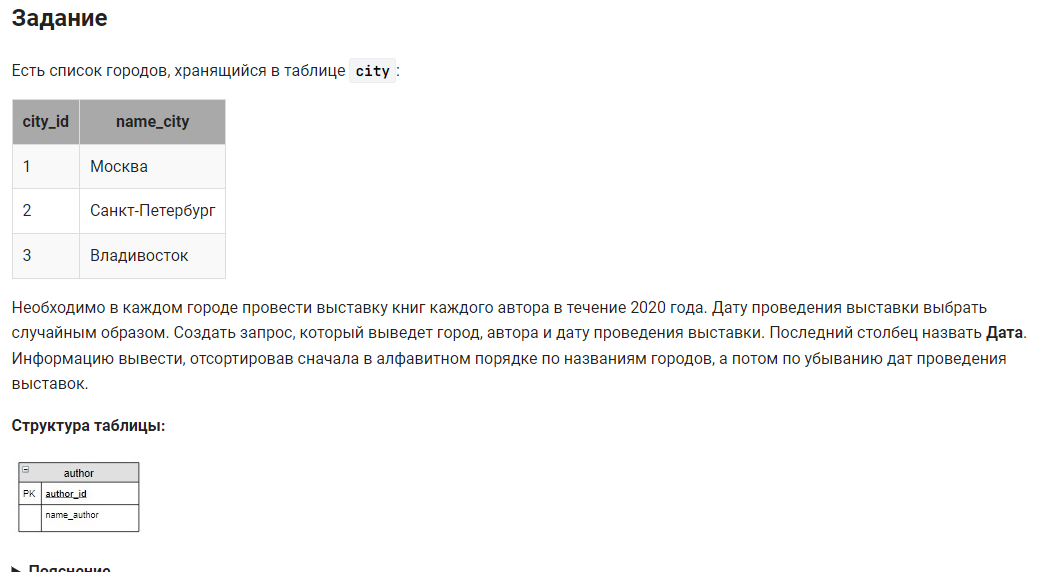

In [ ]:
SELECT
    name_city, name_author, DATE_ADD('2020-01-01',INTERVAL FLOOR(RAND() * 365) DAY) as Дата
FROM
    city CROSS JOIN  author
ORDER BY 
    name_city, Дата DESC

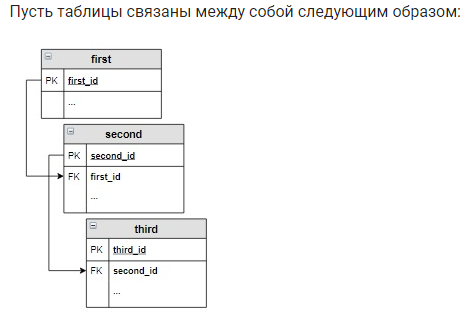

тогда запрос на выборку для этих таблиц будет иметь вид:

SELECT
 ...
FROM
    first 
    INNER JOIN  second ON first.first_id = second.first_id
    INNER JOIN  third  ON second.second_id = third.second_id

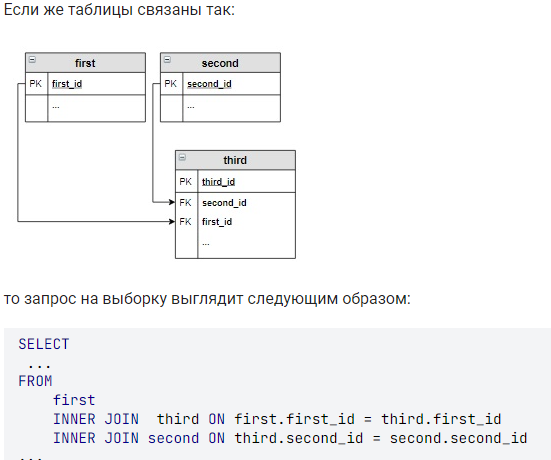

In [ ]:
# Вывести информацию о тех книгах, их авторах и жанрах, цена которых принадлежит интервалу от 500  до 700 рублей  включительно.
SELECT title, name_author, name_genre, price, amount
FROM
    author 
    INNER JOIN  book ON author.author_id = book.author_id
    INNER JOIN genre ON genre.genre_id = book.genre_id
WHERE price BETWEEN 500 AND 700;

In [ ]:
 Вывести информацию о книгах (жанр, книга, автор), относящихся к жанру, включающему слово «роман» в отсортированном по названиям книг виде.

SELECT name_genre, title, name_author
FROM
    author 
    INNER JOIN  book ON author.author_id = book.author_id
    INNER JOIN genre ON genre.genre_id = book.genre_id
WHERE name_genre IN ('роман')
ORDER BY title;

В запросах с групповыми функциями могут использоваться несколько таблиц, между которыми используются различные типы соединений.

Пример

Вывести количество различных книг каждого автора. Информацию отсортировать в алфавитном порядке по фамилиям  авторов.

Запрос:

SELECT name_author, count(title) AS Количество
FROM 
    author INNER JOIN book
    on author.author_id = book.author_id
GROUP BY name_author
ORDER BY name_author;    
Результат

+------------------+------------+
| name_author      | Количество |
+------------------+------------+
| Булгаков М.А.    | 2          |
| Достоевский Ф.М. | 3          |
| Есенин С.А.      | 2          |
| Пастернак Б.Л.   | 1          |
+------------------+------------+
При использовании соединения INNER JOIN мы не можем узнать, что книг Лермонтова на складе нет, но предполагается, что они могут быть.  Чтобы автор Лермонтов был включен в результат, нужно изменить соединение таблиц.

Запрос:

SELECT name_author, count(title) AS Количество
FROM 
    author LEFT JOIN book
    on author.author_id = book.author_id
GROUP BY name_author
ORDER BY name_author;   
Результат:

+------------------+------------+
| name_author      | Количество |
+------------------+------------+
| Булгаков М.А.    | 2          |
| Достоевский Ф.М. | 3          |
| Есенин С.А.      | 2          |
| Лермонтов М.Ю.   | 0          |
| Пастернак Б.Л.   | 1          |
+------------------+------------+

In [ ]:
Посчитать количество экземпляров  книг каждого автора из таблицы author.  
Вывести тех авторов,  количество книг которых меньше 10, в отсортированном по возрастанию количества виде. 
Последний столбец назвать Количество.

In [ ]:
SELECT name_author, SUM(amount) AS Количество
FROM 
    author LEFT JOIN book
    on author.author_id = book.author_id
GROUP BY name_author
HAVING (Количество < 10) or (Количество is NULL)
ORDER BY Количество ASC